In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

In [96]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

In [97]:
f = h5py.File('200_512_f32.h5', 'r')
head = f.attrs

In [98]:
head.keys()

<KeysViewHDF5 ['density_unit', 'dims', 'dt', 'dx', 'energy_unit', 'gamma', 'length_unit', 'mass_unit', 'n_fields', 'n_step', 't', 'time_unit', 'velocity_unit']>

In [99]:
f.keys()

<KeysViewHDF5 ['Energy', 'GasEnergy', 'density', 'momentum_x', 'momentum_y', 'momentum_z']>

In [100]:
gamma = head['gamma'] # ratio of specific heats
t  = head['t'] # time of this snapshot, in kyr
nx = head['dims'][0] # number of cells in the x direction
ny = head['dims'][1] # number of cells in the y direction
nz = head['dims'][2] # number of cells in the z direction
dx = head['dx'][0] # width of cell in x direction
dy = head['dx'][1] # width of cell in y direction
dz = head['dx'][2] # width of cell in z direction
l_c = head['length_unit']
t_c = head['time_unit']
m_c = head['mass_unit']
d_c = head['density_unit']                 
v_c = head['velocity_unit']
e_c = head['energy_unit']
p_c = e_c # pressure units are the same as energy density units, density*velocity^2/length^3

In [101]:
d  = f['density'][:]
GE = f['GasEnergy'][:]
px  = f['momentum_x'][:]
py = f['momentum_y'][:]
pz = f['momentum_z'][:]

In [102]:
f.close()

In [103]:
km = 1e-5

Vx = (px*v_c*km)/d #velocity in the x direction
Vy = (py*v_c*km)/d #velocity in the y direction
Vz = (pz*v_c*km)/d #velocity in the z direction

In [104]:
print(np.min(Vx), np.max(Vx))

-171.5154278149247 1361.096822400467


In [105]:
mu = 1.0 # mean molecular weight (mu) of 1

d = d*d_c # to convert from code units to cgs, multiply by the code unit for that variable
n = d/(mu*mp) # number density, particles per cm^3

In [106]:
T = GE*(gamma - 1.0)*p_c / (n*kb) #Temperature

In [107]:
print(np.min(n), np.max(n))

0.0005926918238401413 292.1434631347656


In [108]:
## Masking
n_clouds = np.where(T<2e4, n, 10e-10)
n_int = np.where((T >= 2e4) & (T <= 5e5), n, 10e-10)
n_wind = np.where(T>5e5, n, 10e-10)

In [109]:
n_clouds_x = np.log10(np.sum(n_clouds, axis=0)*dx*l_c)
n_clouds_y = np.log10(np.sum(n_clouds, axis=1)*dx*l_c)
n_clouds_z = np.log10(np.sum(n_clouds, axis=2)*dx*l_c)

In [110]:
n_int_x = np.log10(np.sum(n_int, axis=0)*dx*l_c)
n_int_y = np.log10(np.sum(n_int, axis=1)*dx*l_c)
n_int_z = np.log10(np.sum(n_int, axis=2)*dx*l_c)

In [111]:
n_wind_x = np.log10(np.sum(n_wind, axis=0)*dx*l_c)
n_wind_y = np.log10(np.sum(n_wind, axis=1)*dx*l_c)
n_wind_z = np.log10(np.sum(n_wind, axis=2)*dx*l_c)

In [112]:
Vx_clouds = np.where(T<2e4, Vx, np.NaN)
Vx_int = np.where((T >= 2e4) & (T <= 5e5), Vx, np.NaN)
Vx_wind = np.where(T>5e5, Vx, np.NaN)

In [113]:
Vy_clouds = np.where(T<2e4, Vy, np.NaN)
Vy_int = np.where((T >= 2e4) & (T <= 5e5), Vy, np.NaN)
Vy_wind = np.where(T>5e5, Vy, np.NaN)

In [114]:
Vz_clouds = np.where(T<2e4, Vz, np.NaN)
Vz_int = np.where((T >= 2e4) & (T <= 5e5), Vz, np.NaN)
Vz_wind = np.where(T>5e5, Vz, np.NaN)

<h2>Cloud</h2>

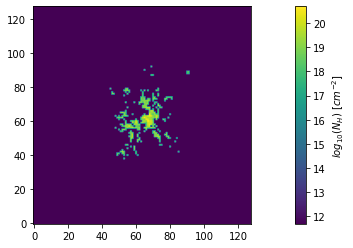

In [115]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds_x.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

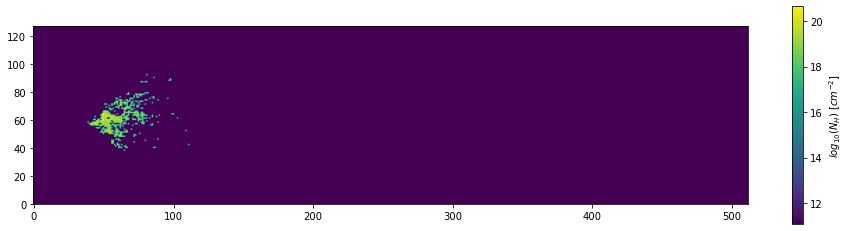

In [116]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds_y.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

<h2>Intermediate Gas</h2>

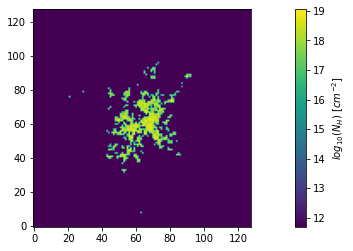

In [117]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_int_x.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

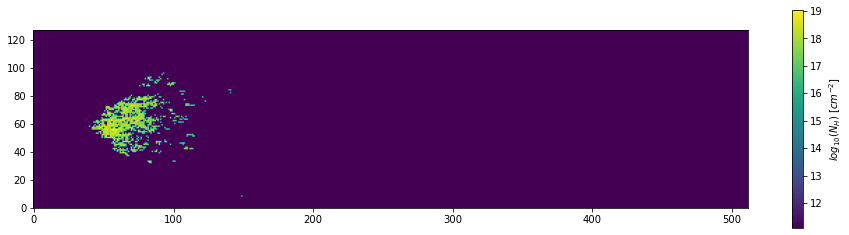

In [118]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_int_y.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

<h2>Wind<h2>

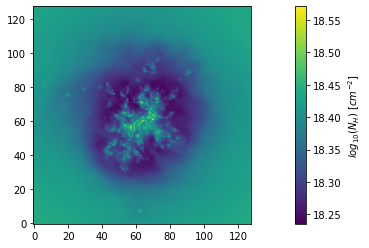

In [119]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_wind_x.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

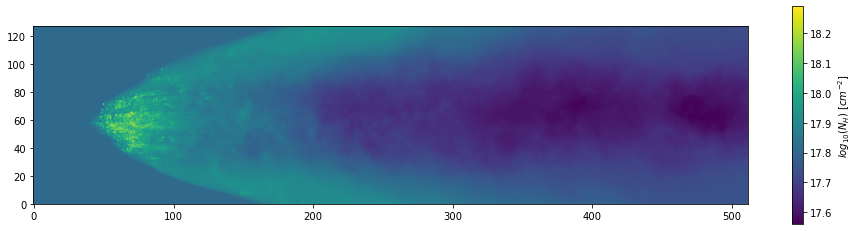

In [120]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_wind_y.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

<h2>Colorblocking the Phases</h2>

In [121]:
## use np.where() with only the condition so that it returns only indices
## I don't think this can work for projections, so need to know c.o.m. of cloud

In [124]:
n_clouds = np.where(T<2e4, n, 0)
com = ndimage.center_of_mass(n_clouds)
com

(54.92386067738623, 65.5885790373869, 60.67862257974202)

In [144]:
cmap = colors.ListedColormap(['navy', 'purple','orangered'])
bounds=[0,2e4,5e5,np.inf]
norm = colors.BoundaryNorm(bounds, cmap.N)

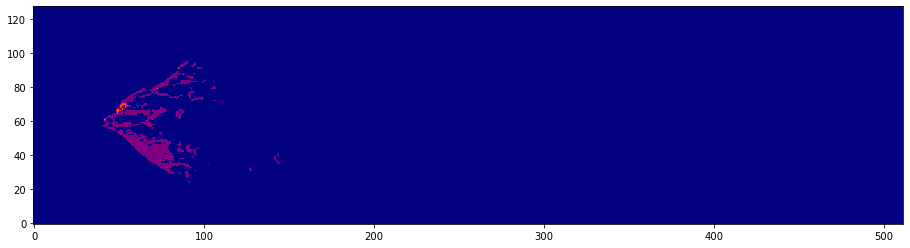

In [145]:
figure = plt.figure(figsize=(16,4))
image = plt.imshow(T[:,int(com[1]),:].T, origin='lower', cmap=cmap)

In [ ]:
figure = plt.figure(figsize=(16,4))
image = 

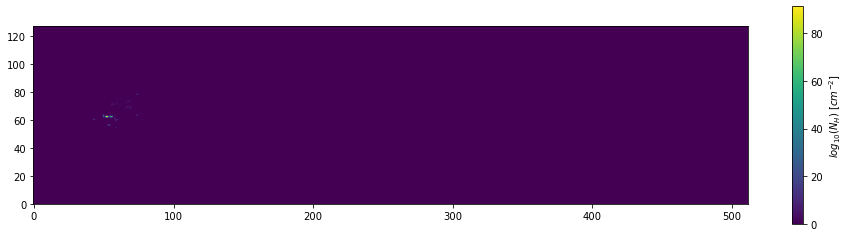

In [130]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds[:,int(com[1]),:].T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

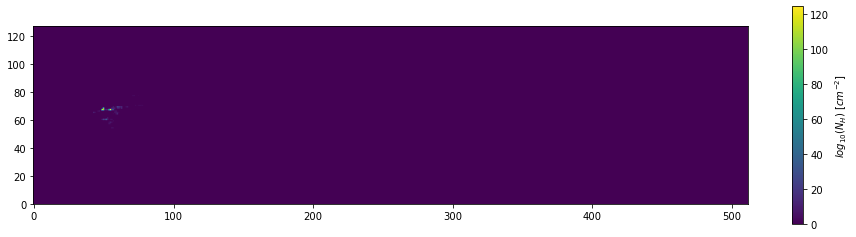

In [131]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds[:,:,int(com[2])].T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

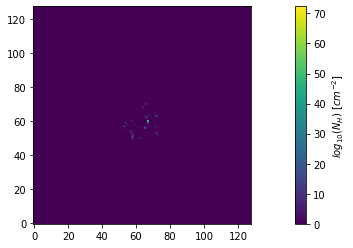

In [132]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds[int(com[0]),:,:].T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

<h2>Cloud Stats</h2>

In [ ]:
print("X Direction Velocities")

print("Mean: ", np.nanmean(Vx_clouds), " km/s")
print("Median: ", np.nanmedian(Vx_clouds), " km/s")
print("75th Percentile: ", np.nanpercentile(Vx_clouds, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vx_clouds, 90), " km/s")

In [ ]:
print("Y Direction Velocities")

print("Mean: ", np.nanmean(Vy_clouds), " km/s")
print("Median: ", np.nanmedian(Vy_clouds), " km/s")
print("75th Percentile: ", np.nanpercentile(Vy_clouds, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vy_clouds, 90), " km/s")

In [ ]:
print("Z Direction Velocities")

print("Mean: ", np.nanmean(Vz_clouds), " km/s")
print("Median: ", np.nanmedian(Vz_clouds), " km/s")
print("75th Percentile: ", np.nanpercentile(Vz_clouds, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vz_clouds, 90), " km/s")

In [ ]:
V_clouds = np.sqrt(np.power(Vx_clouds, 2) + np.power(Vy_clouds, 2) + np.power(Vz_clouds, 2))

In [ ]:
print("Speeds")

print("Mean: ", np.nanmean(V_clouds), " km/s")
print("Median: ", np.nanmedian(V_clouds), " km/s")
print("75th Percentile: ", np.nanpercentile(V_clouds, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(V_clouds, 90), " km/s")

<h2>Intermediate Gas Stats</h2>

In [ ]:
print("X Direction Velocities")

print("Mean: ", np.nanmean(Vx_int), " km/s")
print("Median: ", np.nanmedian(Vx_int), " km/s")
print("75th Percentile: ", np.nanpercentile(Vx_int, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vx_int, 90), " km/s")

In [ ]:
print("Y Direction Velocities")

print("Mean: ", np.nanmean(Vy_int), " km/s")
print("Median: ", np.nanmedian(Vy_int), " km/s")
print("75th Percentile: ", np.nanpercentile(Vy_int, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vy_int, 90), " km/s")

In [ ]:
print("Z Direction Velocities")

print("Mean: ", np.nanmean(Vz_int), " km/s")
print("Median: ", np.nanmedian(Vz_int), " km/s")
print("75th Percentile: ", np.nanpercentile(Vz_int, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vz_int, 90), " km/s")

In [ ]:
V_int = np.sqrt(np.power(Vx_int, 2) + np.power(Vy_int, 2) + np.power(Vz_int, 2))

In [ ]:
print("Speeds")

print("Mean: ", np.nanmean(V_int), " km/s")
print("Median: ", np.nanmedian(V_int), " km/s")
print("75th Percentile: ", np.nanpercentile(V_int, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(V_int, 90), " km/s")

<h2>Wind Stats</h2>

In [ ]:
print("X Direction Velocities")

print("Mean: ", np.nanmean(Vx_wind), " km/s")
print("Median: ", np.nanmedian(Vx_wind), " km/s")
print("75th Percentile: ", np.nanpercentile(Vx_wind, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vx_wind, 90), " km/s")

In [ ]:
print("Y Direction Velocities")

print("Mean: ", np.nanmean(Vy_wind), " km/s")
print("Median: ", np.nanmedian(Vy_wind), " km/s")
print("75th Percentile: ", np.nanpercentile(Vy_wind, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vy_wind, 90), " km/s")

In [ ]:
print("Z Direction Velocities")

print("Mean: ", np.nanmean(Vz_wind), " km/s")
print("Median: ", np.nanmedian(Vz_wind), " km/s")
print("75th Percentile: ", np.nanpercentile(Vz_wind, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vz_wind, 90), " km/s")

In [ ]:
V_wind = np.sqrt(np.power(Vx_wind, 2) + np.power(Vy_wind, 2) + np.power(Vz_wind, 2))

In [ ]:
print("Speeds")

print("Mean: ", np.nanmean(V_wind), " km/s")
print("Median: ", np.nanmedian(V_wind), " km/s")
print("75th Percentile: ", np.nanpercentile(V_wind, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(V_wind, 90), " km/s")